# Neural Networks for Forest Fires

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import tensorflow as tf
tf.debugging.set_log_device_placement(False) 
import warnings
warnings.filterwarnings('ignore')

In [2]:
tf.random.set_seed(14) 

In [3]:
forest=pd.read_csv('forestfires.csv')
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
df = forest.copy() 
df.drop(df.columns[11:30],axis=1,inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [6]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category'],
      dtype='object')

In [7]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [8]:
df.month.value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [9]:
df.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [10]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df.month= label_encoder.fit_transform(df.month) 
df.day= label_encoder.fit_transform(df.day) 
df.size_category= label_encoder.fit_transform(df.size_category) 
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [11]:
from imblearn.combine import SMOTETomek
from collections import Counter

resamp = df.copy()

a = resamp.iloc[:,:-1]
b = resamp.iloc[:,-1]
print(Counter(b))

smt = SMOTETomek(sampling_strategy = 'auto')
a, b = smt.fit_resample(a, b)


print(Counter(b)) 

Counter({1: 378, 0: 139})
Counter({1: 368, 0: 368})


In [12]:
X = a
Y = b
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [13]:
model = Sequential()
model.add(Dense(14, input_dim=11, kernel_initializer='uniform', activation='relu'))
model.add(Dense(12,kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
hist = model.fit(X_train, y_train, validation_split=0.33, epochs=50, batch_size=10)

Epoch 1/50
35/35 [==============================] - 5s 33ms/step - loss: 0.6918 - accuracy: 0.5130 - val_loss: 0.6883 - val_accuracy: 0.5412
Epoch 2/50
35/35 [==============================] - 0s 13ms/step - loss: 0.6826 - accuracy: 0.5681 - val_loss: 0.6681 - val_accuracy: 0.6000
Epoch 3/50
35/35 [==============================] - 0s 11ms/step - loss: 0.6467 - accuracy: 0.6290 - val_loss: 0.6145 - val_accuracy: 0.7588
Epoch 4/50
35/35 [==============================] - 0s 11ms/step - loss: 0.5782 - accuracy: 0.8029 - val_loss: 0.5197 - val_accuracy: 0.9706
Epoch 5/50
35/35 [==============================] - 0s 10ms/step - loss: 0.4819 - accuracy: 0.8493 - val_loss: 0.4277 - val_accuracy: 0.9765
Epoch 6/50
35/35 [==============================] - 0s 9ms/step - loss: 0.3995 - accuracy: 0.9043 - val_loss: 0.3285 - val_accuracy: 0.9176
Epoch 7/50
35/35 [==============================] - 0s 6ms/step - loss: 0.3105 - accuracy: 0.9246 - val_loss: 0.2567 - val_accuracy: 0.9353
Epoch 8/50
35/3

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9955


In [17]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [18]:
hist_df = pd.DataFrame(hist.history)
hist_df["epoch"]=hist.epoch
hist_df.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
45,0.047129,0.982609,0.053972,0.982353,45
46,0.069507,0.971014,0.112716,0.958824,46
47,0.071290,0.973913,0.018756,0.988235,47
48,0.016758,0.997101,0.031119,0.988235,48
49,0.051160,0.979710,0.011695,1.000000,49


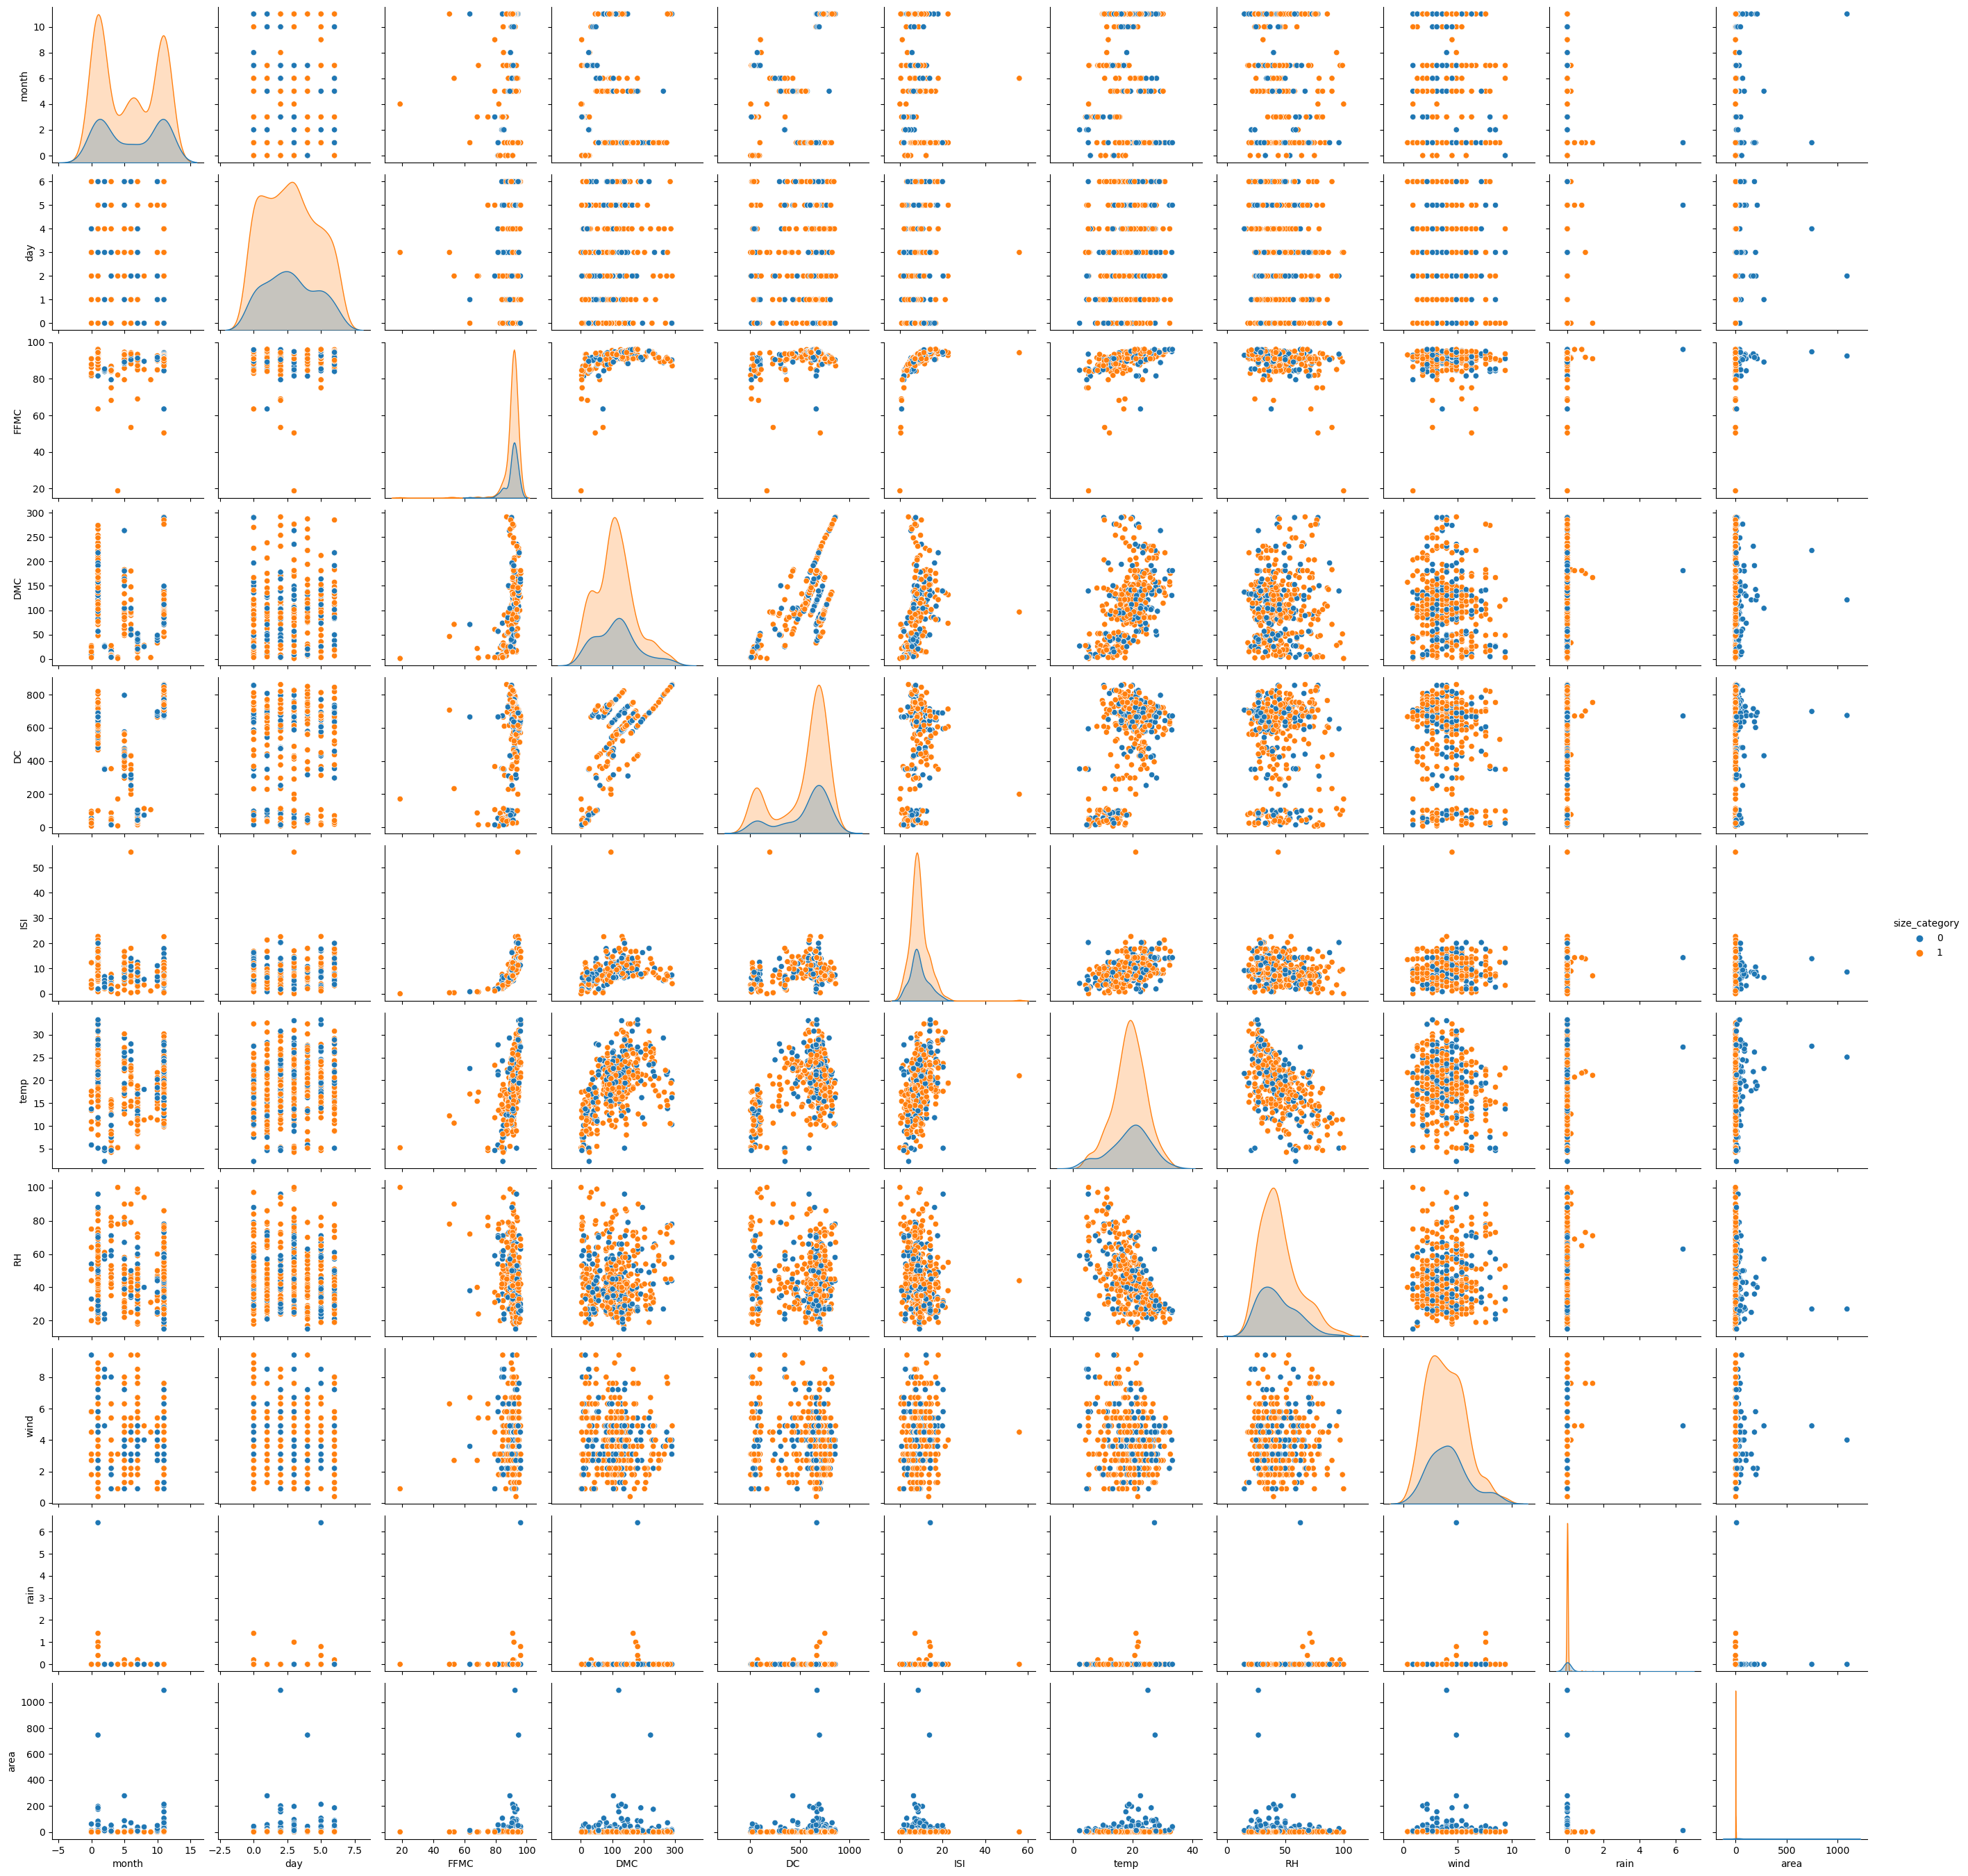

In [24]:
sns.pairplot(df, hue='size_category')

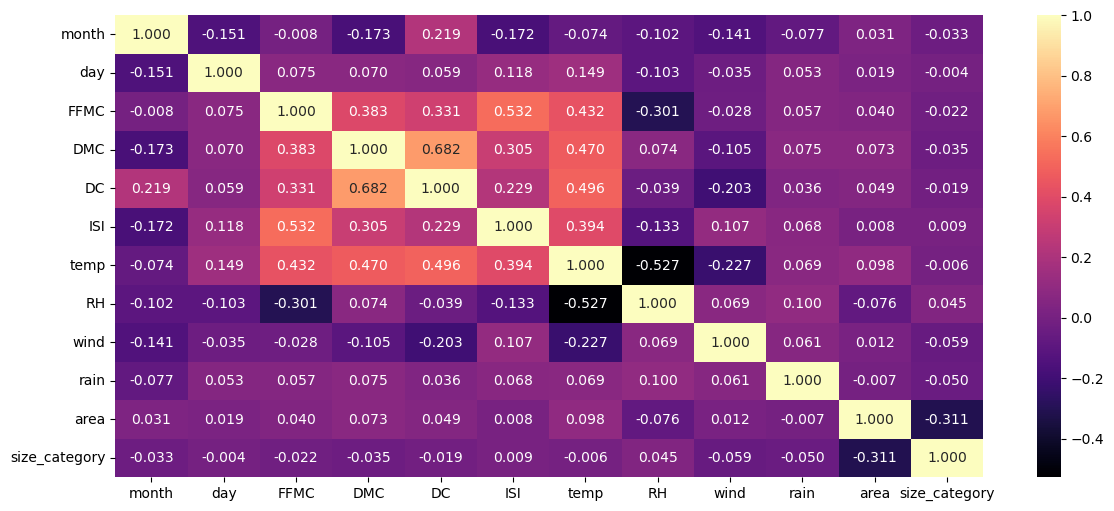

In [25]:
plt.figure(figsize = (14, 6));
sns.heatmap(df.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

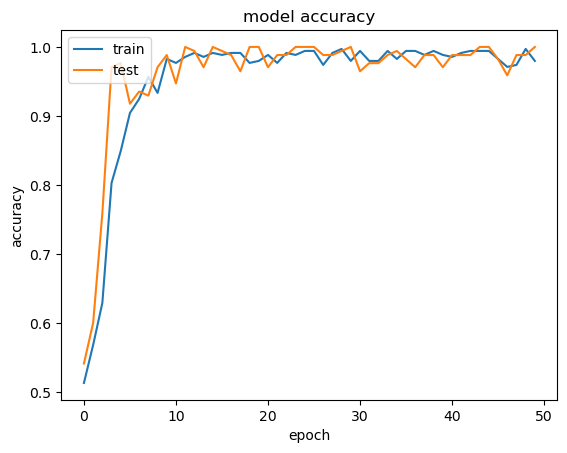

In [26]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

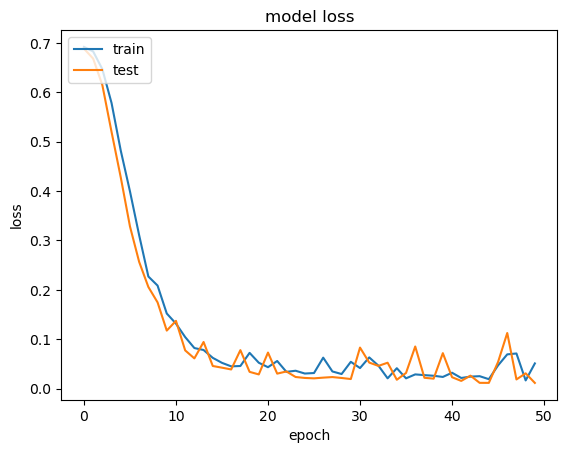

In [27]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [28]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [29]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [30]:
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [31]:
from keras.layers import Dropout

def create_model2(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(14,input_dim = 11,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(12,input_dim = 14,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,kernel_initializer='uniform',activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [32]:
model2 = KerasClassifier(build_fn = create_model2,verbose = 0,batch_size = 20,epochs = 50)

In [33]:
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

In [34]:
param_grids2 = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

In [35]:
grid2 = GridSearchCV(estimator = model2,param_grid = param_grids2,cv = KFold(),verbose = 10)
grid_result2 = grid2.fit(X_standardized,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.993 total time=   8.5s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.986 total time=   6.0s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.980 total time=   7.3s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.980 total time=   6.9s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   7.0s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [36]:
print('Best : {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means2 = grid_result2.cv_results_['mean_test_score']
stds2 = grid_result2.cv_results_['std_test_score']
params2 = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means2, stds2, params2):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9918367385864257, using {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.987764298915863,0.007939584448485866 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9659955859184265,0.03990527064553703 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9673745155334472,0.0199200810746446 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.987764298915863,0.00510052655052096 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9700772047042847,0.023018138470343084 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.9483820557594299,0.028381714015121382 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9918367385864257,0.010884353518492143 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9714285731315613,0.02292829885170172 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.9360544204711914,0.07846460095007787 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [37]:
def create_model3(activation_function,init):
    model = Sequential()
    model.add(Dense(14,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(12,input_dim = 14,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [38]:
model3 = KerasClassifier(build_fn = create_model3,verbose = 0,batch_size = 20,epochs = 50)

In [39]:
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

In [40]:
param_grids3 = dict(activation_function = activation_function,init = init)

In [41]:
grid3 = GridSearchCV(estimator = model3,param_grid = param_grids3,cv = KFold(),verbose = 10)
grid_result3 = grid3.fit(X_standardized,Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.014 total time=   8.5s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.803 total time=   7.9s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.429 total time=   9.1s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.524 total time=   8.5s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.156 total time=   7.4s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.980 total time=   7.9s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................
[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.959 total time=   7.9s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................
[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=1.000 total time=   8.1s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................
[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=1.000 total time=   7.3s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.993 total time=   7.9s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.980 total time=   7.7s
[CV 4/5; 11/12] START activation_f

In [42]:
print('Best : {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means3 = grid_result3.cv_results_['mean_test_score']
stds3 = grid_result3.cv_results_['std_test_score']
params3 = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means3, stds3, params3):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9891156435012818, using {'activation_function': 'tanh', 'init': 'normal'}
0.3850156323984265,0.2778089362823541 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.38095238208770754,0.2666805494571377 with: {'activation_function': 'softmax', 'init': 'normal'}
0.3578231245279312,0.2766491882964411 with: {'activation_function': 'softmax', 'init': 'zero'}
0.9877551078796387,0.010884353518492143 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9877551078796387,0.009024828053400404 with: {'activation_function': 'relu', 'init': 'normal'}
0.20136054158210753,0.18488389311191603 with: {'activation_function': 'relu', 'init': 'zero'}
0.9850340127944947,0.016326523820562055 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9891156435012818,0.012617174430937537 with: {'activation_function': 'tanh', 'init': 'normal'}
0.20136054158210753,0.18488389311191603 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9863945603370666,0.01551258167813984 with: {'activ

In [43]:
def create_model4(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [44]:
model4 = KerasClassifier(build_fn = create_model4,verbose = 0,batch_size = 20,epochs = 50)

In [45]:
neuron1 = [4,8,14]
neuron2 = [4,8,12]

In [46]:
param_grids4 = dict(neuron1 = neuron1,neuron2 = neuron2)

In [47]:
grid4 = GridSearchCV(estimator = model4,param_grid = param_grids4,cv = KFold(),verbose = 10)
grid_result4 = grid4.fit(X_standardized,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=4;, score=0.993 total time=   2.7s
[CV 2/5; 1/9] START neuron1=4, neuron2=4........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=4;, score=0.986 total time=   2.6s
[CV 3/5; 1/9] START neuron1=4, neuron2=4........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=4;, score=0.918 total time=   2.6s
[CV 4/5; 1/9] START neuron1=4, neuron2=4........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=4;, score=0.986 total time=   3.1s
[CV 5/5; 1/9] START neuron1=4, neuron2=4........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=4;, score=0.844 total time=   2.9s
[CV 1/5; 2/9] START neuron1=4, neuron2=8........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=8;,

In [48]:
print('Best : {}, using {}'.format(grid_result4.best_score_,grid_result4.best_params_))
means4 = grid_result4.cv_results_['mean_test_score']
stds4 = grid_result4.cv_results_['std_test_score']
params4 = grid_result4.cv_results_['params']
for mean, stdev, param in zip(means4, stds4, params4):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9891156435012818, using {'neuron1': 8, 'neuron2': 8}
0.945587420463562,0.05789070116668986 with: {'neuron1': 4, 'neuron2': 4}
0.9836826682090759,0.0069500724995364286 with: {'neuron1': 4, 'neuron2': 8}
0.9877642869949341,0.00793958650508647 with: {'neuron1': 4, 'neuron2': 12}
0.9850340127944947,0.00999791417234144 with: {'neuron1': 8, 'neuron2': 4}
0.9891156435012818,0.009227657784435834 with: {'neuron1': 8, 'neuron2': 8}
0.9863945603370666,0.009620498646695666 with: {'neuron1': 8, 'neuron2': 12}
0.9891156435012818,0.009227657784435834 with: {'neuron1': 14, 'neuron2': 4}
0.9864037513732911,0.009627013029582644 with: {'neuron1': 14, 'neuron2': 8}
0.9891156435012818,0.011053112607258131 with: {'neuron1': 14, 'neuron2': 12}


In [49]:
def create_model_fnl():
    model = Sequential()
    model.add(Dense(4,input_dim = 11,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4,input_dim = 4,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001) 
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [50]:
model_fnl = KerasClassifier(build_fn = create_model_fnl,verbose = 0,batch_size = 20,epochs = 50)

In [51]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_standardized,Y, test_size = 0.3)

In [52]:
hist2 = model_fnl.fit(X_train_1,y_train_1)

In [53]:
from sklearn.metrics import confusion_matrix,classification_report
def report_model(model):
    model_preds = model.predict(X_test_1)
    print(confusion_matrix(y_test_1,model_preds))
    print(classification_report(y_test_1,model_preds))
report_model(model_fnl)

7/7 [==============================] - 0s 2ms/step
[[108   3]
 [  1 109]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       111
           1       0.97      0.99      0.98       110

    accuracy                           0.98       221
   macro avg       0.98      0.98      0.98       221
weighted avg       0.98      0.98      0.98       221

